## Language classification
Here we train the classifier to recognize the language of tweets from multiple users. The tweets are in different languages with emojis and hashtags, just like a regualar tweet. Care has been taken to remove punctuations and other characters that might hinder the performance of the classification

In [368]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns



In [369]:
dataset = pd.read_csv('/Users/swat/Desktop/Datathon/datasets/dataset1/dataset1.csv')

In [370]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3038 entries, 0 to 3037
Data columns (total 3 columns):
id          3038 non-null int64
text        3038 non-null object
language    3038 non-null object
dtypes: int64(1), object(2)
memory usage: 71.3+ KB


Below plot shows the distribution of different languages in the training set

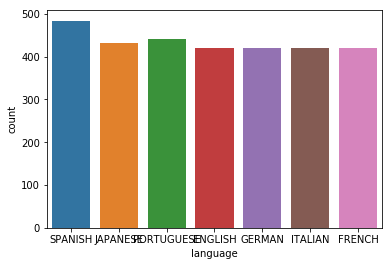

In [375]:
sns.countplot(x='language', data=dataset);

In [371]:
dataset.language.head()

0           SPA
1      JAPANESE
2    PORTUGUESE
3       ENGLISH
4            EN
Name: language, dtype: object

The emojis, unwanted spaces and other unhelpful characters are removed below

In [372]:

import re
dataset['text'] = dataset['text'].str.replace('[\W]', ' ')
dataset['text'] = dataset['text'].str.replace('[\s+]', ' ')
dataset['text'] = dataset['text'].str.replace('["USER"]', ' ')
test = []
for sen in dataset['text']:    
    doc = re.sub("\d",'',sen)
    doc= re.sub('[\s]+',' ',doc)
    test.append(doc)


X1= test


The training dataset consisted of different codes for the same language. We optimise the code to have a uniform name

In [374]:
dataset['language'] = dataset['language'].apply(lambda spa: 'SPANISH' if spa == 'SPA' else ('SPANISH' if (spa == 'ES') else spa))
dataset['language'] = dataset['language'].apply(lambda eng: 'ENGLISH' if eng == 'EN' else ('ENGLISH' if (eng == 'ENG') else eng))
dataset['language'] = dataset['language'].apply(lambda jap: 'JAPANESE' if jap == 'JA' else ('JAPANESE' if (jap == 'JAP') else jap))
dataset['language'] = dataset['language'].apply(lambda por: 'PORTUGUESE' if por == 'PT' else ('PORTUGUESE' if (por == 'POR') else por))
dataset['language'] = dataset['language'].apply(lambda ger: 'GERMAN' if ger == 'DE' else ('GERMAN' if (ger == 'GER') else ger))
dataset['language'] = dataset['language'].apply(lambda fre: 'FRENCH' if fre == 'FR' else ('FRENCH' if (fre == 'FRA') else fre))
dataset['language'] = dataset['language'].apply(lambda ita: 'ITALIAN' if ita == 'IT' else ('ITALIAN' if (ita == 'ITA') else ita))

y = dataset['language']
dataset.language.unique()


array(['SPANISH', 'JAPANESE', 'PORTUGUESE', 'ENGLISH', 'GERMAN',
       'ITALIAN', 'FRENCH'], dtype=object)

This can be done with both Count Vectorizer and TfIdf vectorizer.
TfIdf gives better accuracy.

##code for Count vectoriser
from sklearn.feature_extraction.text import CountVectorizer ## marked as markdown
vectorizer = CountVectorizer()
X=vectorizer.fit_transform(X1).toarray()
vectorizer.get_feature_names()

In [345]:
from sklearn.feature_extraction.text import TfidfVectorizer###increased performance marginally
tfidfconverter = TfidfVectorizer(max_features=5000)
X1 = tfidfconverter.fit_transform(X1).toarray()
tfidfconverter.get_feature_names()

['ab',
 'abbiamo',
 'abbigliamento',
 'abençoe',
 'aber',
 'abierta',
 'about',
 'above',
 'abrigo',
 'abstract',
 'abstrait',
 'ac',
 'academia',
 'aceite',
 'acesse',
 'achsen',
 'acompanhando',
 'acontece',
 'acqua',
 'acquarelli',
 'action',
 'actu',
 'ad',
 'adelgazar',
 'adorazione',
 'adores',
 'adoro',
 'adquisici¾n',
 'adventure',
 'adventuretravel',
 'afari',
 'affresco',
 'aforismi',
 'afrique',
 'after',
 'afternoon',
 'ag',
 'age',
 'agora',
 'agênciademodelos',
 'agênciademodelosinfantil',
 'ahora',
 'ai',
 'ainbow',
 'ainda',
 'air',
 'airbnb',
 'aircraft',
 'airline',
 'airlines',
 'aitana',
 'aktuelles',
 'al',
 'alagoas',
 'alba',
 'alchimie',
 'alcuni',
 'ale',
 'alegria',
 'alegrýa',
 'algo',
 'algunos',
 'ali',
 'all',
 'alla',
 'alle',
 'allen',
 'aller',
 'allerheiligen',
 'alles',
 'allora',
 'alma',
 'alone',
 'als',
 'also',
 'alt',
 'alta',
 'alto',
 'altri',
 'altro',
 'alud',
 'alvador',
 'always',
 'am',
 'ama',
 'amanhã',
 'amar',
 'amazing',
 'amazon',
 

The training dataset is split into train,test and validation dataset to escape the danger of overfitting.

In [346]:
from sklearn.model_selection import train_test_split
X_trainset, X_test, y_trainset, y_test = train_test_split(X1,y, test_size=0.3, random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(X_trainset,y_trainset, test_size=0.3/0.7, random_state=0)

In [347]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [348]:
y_pred = classifier.predict(X_valid)

In [349]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_valid, y_pred))



[[107  15   0   0   5   0   0]
 [  4  97   0   1   2   0   1]
 [  1   1 131   0   4   0   0]
 [  3   0   1 125   4   0   2]
 [  0   0   0   0 128   0   0]
 [  2   3   0   3   5 123   9]
 [  3   6   0   2   1   1 122]]


In [350]:
print(classification_report(y_valid, y_pred))

             precision    recall  f1-score   support

    ENGLISH       0.89      0.84      0.87       127
     FRENCH       0.80      0.92      0.85       105
     GERMAN       0.99      0.96      0.97       137
    ITALIAN       0.95      0.93      0.94       135
   JAPANESE       0.86      1.00      0.92       128
 PORTUGUESE       0.99      0.85      0.91       145
    SPANISH       0.91      0.90      0.91       135

avg / total       0.92      0.91      0.91       912



The accuracy is quite high for the validation dataset

In [351]:
print(accuracy_score(y_valid, y_pred))

0.9133771929824561


In [352]:
y_pred_test = classifier.predict(X_test)

In [353]:
print(confusion_matrix(y_test, y_pred_test))

[[111   9   0   1   6   2   0]
 [  5 116   0   1   3   0   2]
 [  1   3 109   0   0   0   1]
 [  2   1   1  99   8   1   3]
 [  1   3   0   0 136   0   0]
 [  1   0   0   4   3 120   5]
 [  3   6   0   2   5   8 130]]


In [354]:
print(accuracy_score(y_test, y_pred_test))

0.9002192982456141


In [355]:
dataset2 = pd.read_csv('/Users/swat/Desktop/Datathon/datasets/dataset1/evaluation/dataset1_interim_eval.csv')

In [356]:

import re
dataset2['text'] = dataset2['text'].str.replace('[\W]', ' ')
dataset2['text'] = dataset2['text'].str.replace('[\s+]', ' ')
dataset2['text'] = dataset2['text'].str.replace('["USER"]', ' ')
test = []
for sen in dataset2['text']:    
    doc = re.sub("\d",'',sen)
    doc= re.sub('[\s]+',' ',doc)
    test.append(doc)


X1_2= test

In [357]:
from sklearn.feature_extraction.text import TfidfVectorizer###increased performance marginally
tfidfconverter = TfidfVectorizer(max_features=5000)
X1 = tfidfconverter.fit_transform(X1_2).toarray()
tfidfconverter.get_feature_names()

['_________________________________',
 '______________________________________________________',
 'ab',
 'abata',
 'abatt',
 'abbiamo',
 'abbiglia',
 'abendkleid',
 'aber',
 'abertos',
 'abgrund',
 'abierto',
 'abiti',
 'abnehmen',
 'about',
 'above',
 'abrigo',
 'abrimos',
 'abrina',
 'abri¾',
 'absoluto',
 'abstracto',
 'abyss',
 'acaba',
 'acalmar',
 'acesso',
 'acessíveis',
 'acharam',
 'achieve',
 'ack',
 'acne',
 'acoge',
 'acomics',
 'aconseil',
 'acontece',
 'acook',
 'acordes',
 'acqua',
 'acrilicpainting',
 'acrobática',
 'acrylicpaint',
 'acrílica',
 'acrílico',
 'actionfigures',
 'actividades',
 'activo',
 'acto',
 'actos',
 'actu',
 'acuariofiliamadrid',
 'ad',
 'adatti',
 'added',
 'adelgazar',
 'adizion',
 'ador',
 'adorazione',
 'adorou',
 'adquisici¾n',
 'adult',
 'adultartclasses',
 'adventure',
 'afa',
 'afael',
 'afaris',
 'affetto',
 'affiliate',
 'affirm',
 'africa',
 'african',
 'africanbeauty',
 'afrika',
 'afrique',
 'after',
 'afting',
 'ag',
 'agenda',
 'agne

In [358]:
y_pred2 = classifier.predict(X1) ##predicting based on unknown test set

## Sentiment classification

Here the same twitter data is handled to analyse the sentiment. Bag of words approach is used again.

In [359]:
datasenti = pd.read_csv('/Users/swat/Desktop/Datathon/datasets/dataset2/dataset2.csv')

In [360]:
datasenti.head()

,id,text,sentiment
0,0,my hair is blue.,1
1,1,i'm sweating my forthcoming trip to e3. if i ...,0
2,2,@USER i'm sorry i don't understand your last...,0
3,3,WEBSITE2018 - my cupcakes,1
4,4,reading buyology before bedtime... great premi...,0


In [376]:
y2=datasenti['sentiment']

In [377]:
import re
datasenti['text'] = datasenti['text'].str.replace('[\W]', ' ')
datasenti['text'] = datasenti['text'].str.replace('[\s+]', ' ')
datasenti['text'] = datasenti['text'].str.replace('["USER"]', ' ')
test = []
for sen in datasenti['text']:    
    doc = re.sub("\d",'',sen)
    doc= re.sub('[\s]+',' ',doc)
    test.append(doc)

X2= test

In [378]:
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, max_df=0.7, min_df=5, stop_words=stopwords.words('english'))
X1 = tfidfconverter.fit_transform(X2).toarray()
tfidfconverter.get_feature_names()

['able',
 'absolutely',
 'across',
 'actually',
 'add',
 'added',
 'afraid',
 'afternoon',
 'ago',
 'agree',
 'agreed',
 'ah',
 'ahh',
 'ahhh',
 'almost',
 'alone',
 'along',
 'already',
 'alright',
 'also',
 'although',
 'always',
 'amazing',
 'amp',
 'another',
 'answer',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'app',
 'appreciate',
 'april',
 'argh',
 'around',
 'arrived',
 'ask',
 'asleep',
 'ate',
 'attend',
 'aw',
 'awake',
 'away',
 'awesome',
 'aww',
 'awww',
 'baby',
 'back',
 'background',
 'bad',
 'band',
 'bank',
 'bb',
 'bday',
 'beach',
 'beautiful',
 'bed',
 'bedtime',
 'beer',
 'behind',
 'believe',
 'best',
 'bestie',
 'bet',
 'better',
 'bff',
 'big',
 'bill',
 'birthday',
 'bit',
 'black',
 'blackberry',
 'blah',
 'blessed',
 'blog',
 'blood',
 'blue',
 'body',
 'boo',
 'book',
 'books',
 'bored',
 'boring',
 'bought',
 'bout',
 'box',
 'boy',
 'boyfriend',
 'brand',
 'break',
 'breakfast',
 'bring',
 'bro',
 'broke',
 'broken',
 'brother',
 'btw'

In [379]:
X1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [383]:
from sklearn.model_selection import train_test_split
X_trainset2, X_test2, y_trainset2, y_test2 = train_test_split(X1,y2, test_size=0.3, random_state=0)

X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X_trainset2,y_trainset2, test_size=0.3/0.7, random_state=0)

In [384]:
from sklearn import ensemble
my_model = ensemble.AdaBoostClassifier(base_estimator = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 50), \
                                       n_estimators=10)
my_model.fit(X_train2,y_train2)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=10, random_state=None)

In [385]:
y_pred2 = my_model.predict(X_valid2)


In [386]:
print(confusion_matrix(y_valid2, y_pred2))

[[ 78 425]
 [ 70 564]]


In [387]:
print(classification_report(y_valid2, y_pred2))

             precision    recall  f1-score   support

          0       0.53      0.16      0.24       503
          1       0.57      0.89      0.70       634

avg / total       0.55      0.56      0.49      1137



In [388]:
print(accuracy_score(y_valid2, y_pred2))

0.5646437994722955
